# DATA EXPLORATION

In [46]:
# IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from collections import Counter
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
#IMPORT LIBRARIES FOR THE ALGORITHM
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [47]:
#LOAD THE WHITE WINE DATASETS
dataset ='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(dataset,sep=';') #DataFrame

In [48]:
#DISPLAY THE FIRST FIVE INSTANCES OF WHITE WINE
display(df.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
#DESCRIBE THE WHITE WINE DATA
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [50]:
#CHECKING FOR MISSING VALUE IN THE DATA SET
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [51]:
#ADDITIONAL INFORMATION ON THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


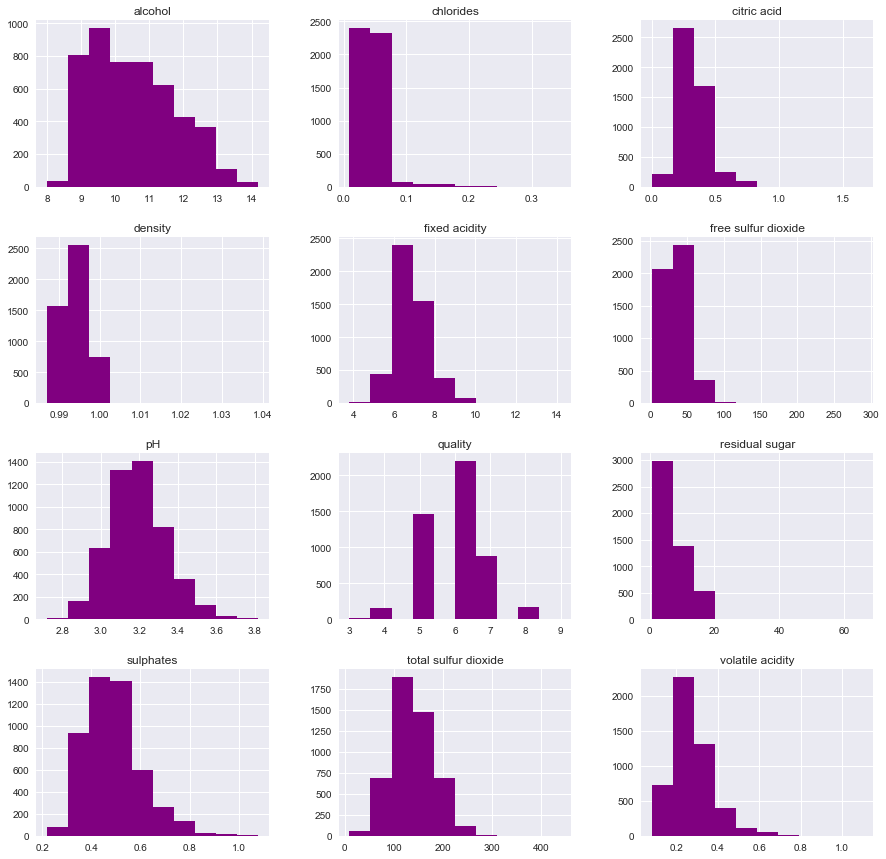

In [52]:
#GRAPHICAL REPRESENTATION OF FEATURES
sns.set()
pd.DataFrame.hist(df,figsize = [15,15], color= 'purple')
plt.show()

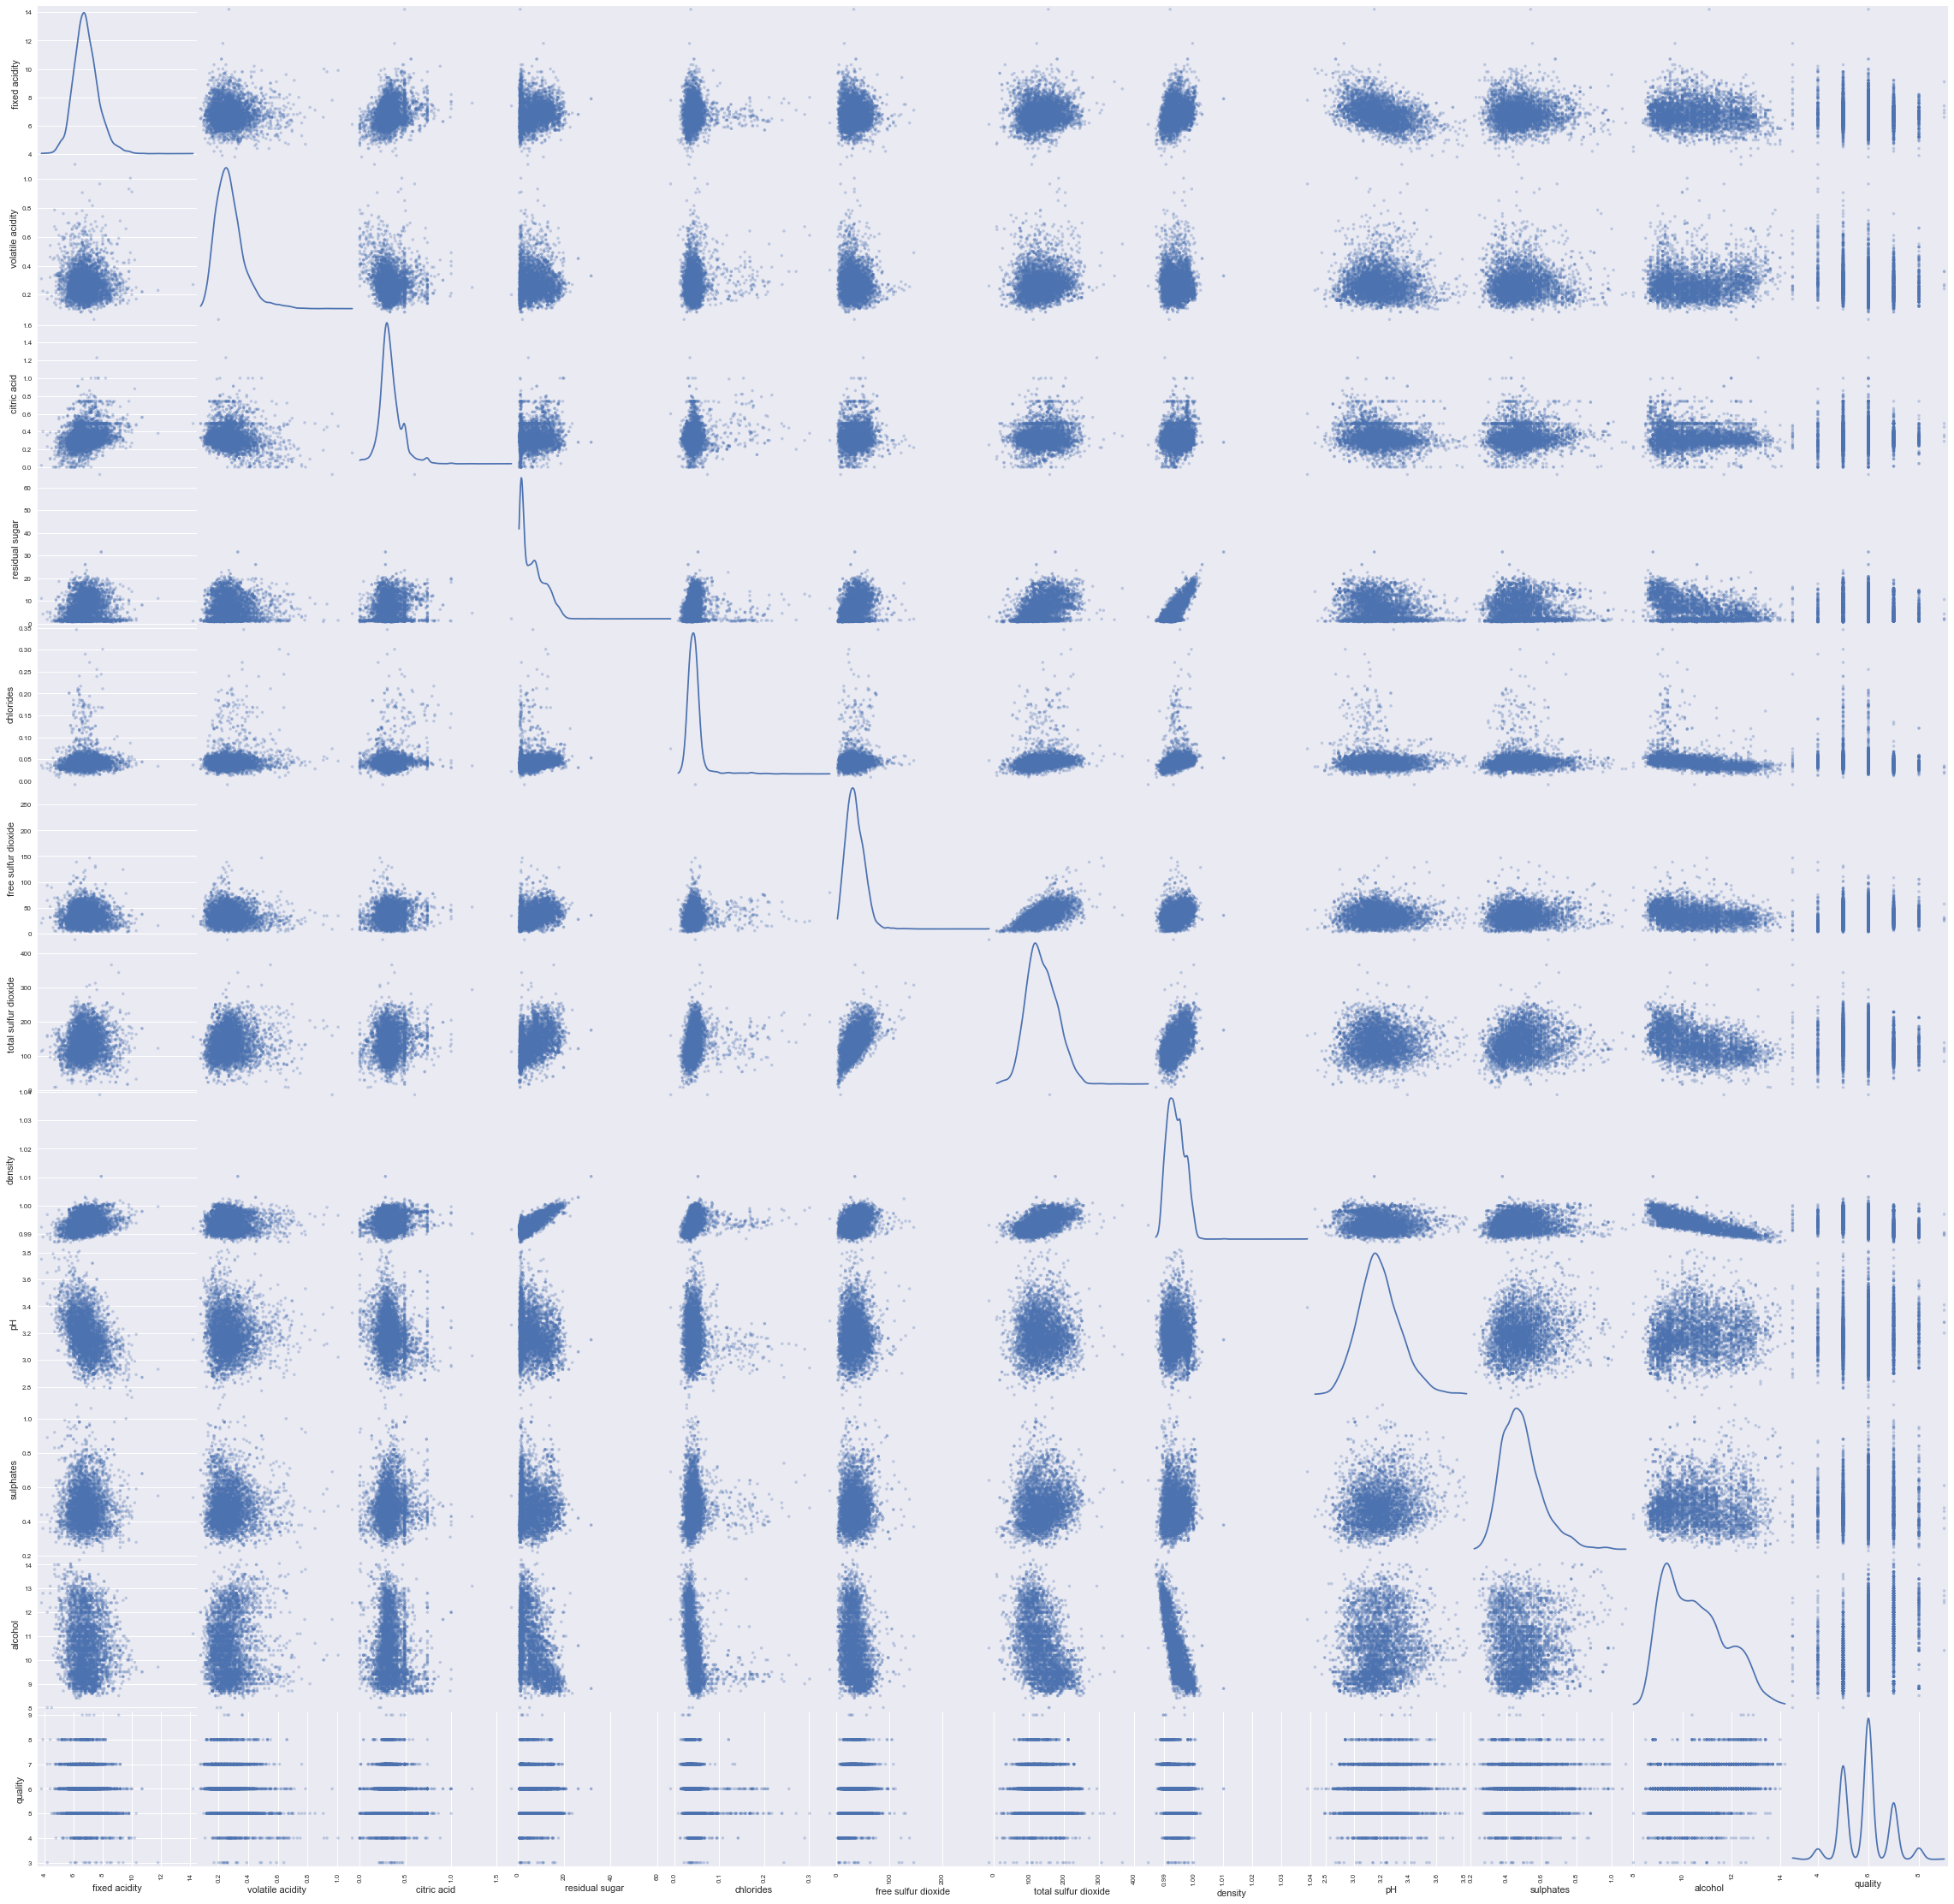

In [53]:
#EXPLORING RELATIONSHIP BETWEEN FEATURES
pd.plotting.scatter_matrix(df, alpha=0.3, figsize =(40,40), diagonal ='kde')
plt.show()

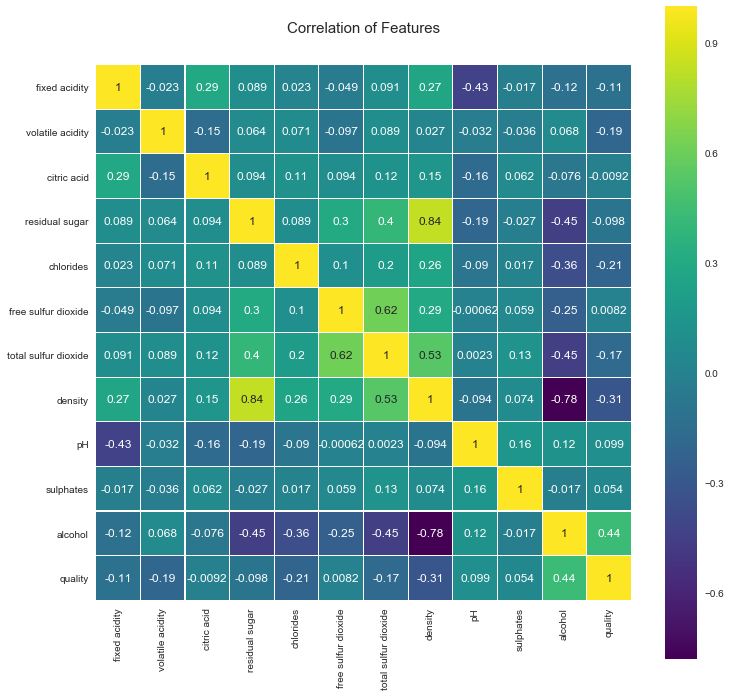

In [54]:
#CORRELATION AMONG THE FEATURES 
#Displaying the heatmap for correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features',y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

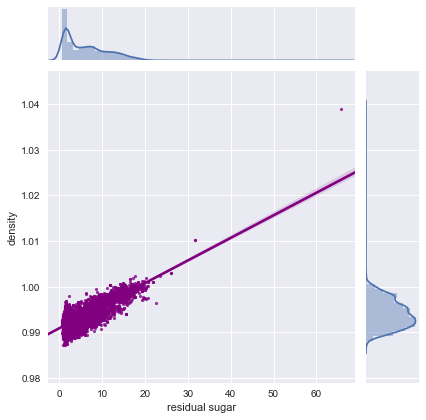

In [55]:
#CO-RELATIONSHIP BETWEEN RESIDUAL SUGAR AND DENSITY
#A new data frame containing only residual sugar and density columns 
#to visulaize their co-relations
Residual_Density = df[['residual sugar','density']]

#Initializing a joint grid with data frame
gridRD = sns.JointGrid(x='residual sugar', y='density', data = Residual_Density, size=6)

#Drawing a regression plot in the grid
gridRD = gridRD.plot_joint(sns.regplot, scatter_kws={'s':10},color='purple')

#A distribution plot in the grid
gridRD = gridRD.plot_marginals(sns.distplot)

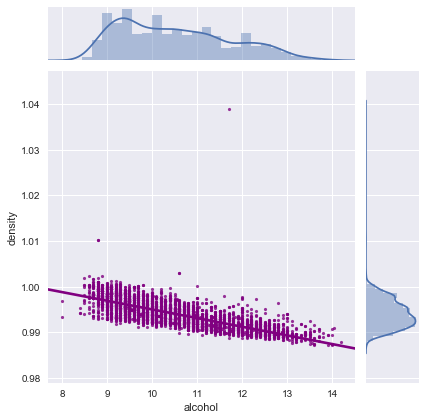

In [56]:
#CO-RELATIONSHIP BETWEEN ALCOHOL AND DENSITY
#A new data frame containing only alcohol and density columns 
#to visulaize their co-relations
Alcohol_Density = df[['alcohol','density']]

#Initializing a joint grid with data frame
gridAD = sns.JointGrid(x='alcohol', y='density', data = Alcohol_Density, size=6)

#Drawing a regression plot in the grid
gridAD = gridAD.plot_joint(sns.regplot, scatter_kws={'s':10},color='purple')

#A distribution plot in the grid
gridRD = gridAD.plot_marginals(sns.distplot)



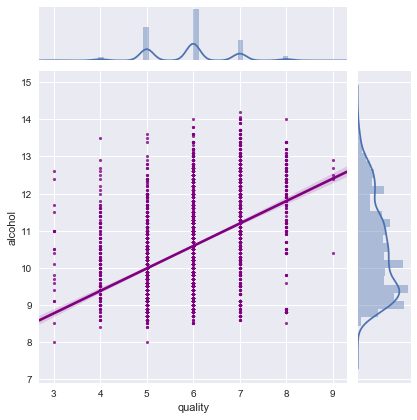

In [57]:
#CO-RELATIONSHIP BETWEEN ALCOHOL AND QUALITY
#A new data frame containing only alcohol and quality columns 
#to visulaize their co-relations
Alcohol_Quality = df[['alcohol','quality']]

#Initializing a joint grid with data frame
gridAQ = sns.JointGrid(x='quality', y='alcohol', data = Alcohol_Quality, size=6)

#Drawing a regression plot in the grid
gridAQ = gridAQ.plot_joint(sns.regplot, scatter_kws={'s':10},color='purple')

#A distribution plot in the grid
gridAQ = gridAQ.plot_marginals(sns.distplot)

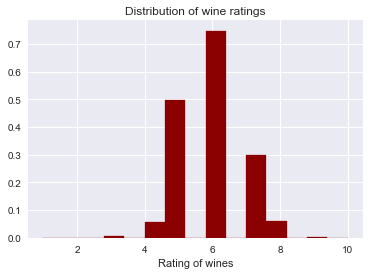

In [58]:
#PLOTTING THE GRAPH FOR QUALITY DISTRIBUTION
plt.hist(df['quality'], range=(1,10), COLOR='darkred',normed=True,bins=15)
plt.xlabel('Rating of wines')
plt.title('Distribution of wine ratings')
plt.show()

# PREPROCESSING THE DATA

In [59]:
#CONVERTING THE VARIBALE QUALITY INTO 3 CLASSES(MULTICLASS CLASSIFICATION)
#CLASS =0(IF QUALITY RATING LESS THAN 4)
#CLASS= 1(IF QUALITY RATING IS BETWEEN 5 & 6)
#CLASS = 2(IF QUALITY RATING IS GREATER AND EQUAL TO 7)
target = []
for i in df['quality']:
    if i >=1 and i <=4:
        target.append('0')
    elif i >= 5 and i <= 6:
        target.append('1')
    elif i >=7 and i <= 10:
        target.append('2')
df['target'] = target

In [60]:
#COUNTING THE NUMBER OF CLASS LABELS
df['target'].unique()
Counter(df['target'])

Counter({'0': 183, '1': 3655, '2': 1060})

In [61]:
#SPLITTING THE DATA INTO FEATURES AND TARGET
X = df.iloc[:,:11]
y = df['target']

In [62]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [63]:
#DISPLAY FIRST 5 ROWS OF THE FEATURE DATA IN X 
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [64]:
#DISPLAY FIRST 5 ROWS OF THE TARGET VARIABLE 
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: object

In [65]:
scaler = StandardScaler().fit(X)
X= scaler.transform(X)

In [66]:
#SPLITTING THE DATA INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [67]:
#THE SHAPE OF TRAINING AND TESTING SET
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3428, 11)
(3428,)
(1470, 11)
(1470,)


# CLASSIFIER ALGORITHMS

### K-NEAREST NEIGHBOR ALGORITHM

##### FOR K=5, DISTANCE = MINKOWSKI

In [68]:
#Applying the knn algorithm for the training data
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

#Prediction of the model on test data
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

#CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_pred))
print('\n')

#DISPLAY CLASSIFICATION REPORT
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_pred))

print('ACCURACY:',accuracy_score(y_test,y_pred))

CONFUSION MATRIX:
[[  6  39   2]
 [ 12 990  92]
 [  0 148 181]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.33      0.13      0.18        47
          1       0.84      0.90      0.87      1094
          2       0.66      0.55      0.60       329

avg / total       0.78      0.80      0.79      1470

ACCURACY: 0.800680272109


###### FOR K=6, DISTANCE = EUCLIDEAN

In [26]:
#Applying the knn algorithm for the training data
knn= KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn.fit(X_train,y_train)

#Prediction of the model on test data
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

#CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_pred))
print('\n')

#DISPLAY CLASSIFICATION REPORT
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_pred))

print('ACCURACY:',accuracy_score(y_test,y_pred))


CONFUSION MATRIX:
[[   6   37    4]
 [  11 1017   66]
 [   0  180  149]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.35      0.13      0.19        47
          1       0.82      0.93      0.87      1094
          2       0.68      0.45      0.54       329

avg / total       0.78      0.80      0.78      1470

ACCURACY: 0.797278911565


###### FOR K=6, DISTANCE = MANHATTAN

In [27]:
#Applying the knn algorithm for the training data
knn= KNeighborsClassifier(n_neighbors=6,metric='manhattan')
knn.fit(X_train,y_train)

#Prediction of the model on test data
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

#CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_pred))
print('\n')

#DISPLAY CLASSIFICATION REPORT
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_pred))

print('ACCURACY:',accuracy_score(y_test,y_pred))


CONFUSION MATRIX:
[[   4   42    1]
 [   8 1018   68]
 [   0  176  153]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.33      0.09      0.14        47
          1       0.82      0.93      0.87      1094
          2       0.69      0.47      0.56       329

avg / total       0.78      0.80      0.78      1470

ACCURACY: 0.799319727891


In [28]:
#FINDING THE OPTIMAL PARAMETR OF KNN USING GRID SEARCH
parameters = {"n_neighbors": range(1,50),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan","chebyshev","minkowski"]}
KNN_optimal= KNeighborsClassifier()

#Applying grid search to obtain parameters
grid_knn = GridSearchCV(KNN_optimal,parameters, cv=10)
grid_knn.fit(X_train,y_train)
y_pred_op = grid_knn.predict(X_test)

#DISPLAY THE BEST OPTIMAL PARAMETERS FRO KNN
print('BEST OPTIMAL PARAMETERS:',grid_knn.best_params_)
print('\n')
#CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_pred_op))
print('\n')

#DISPLAY CLASSIFICATION REPORT
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_pred_op))

print('ACCURACY:',accuracy_score(y_test,y_pred_op))


BEST OPTIMAL PARAMETERS: {'metric': 'euclidean', 'n_neighbors': 38, 'weights': 'distance'}


CONFUSION MATRIX:
[[   2   44    1]
 [   0 1055   39]
 [   0  143  186]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       1.00      0.04      0.08        47
          1       0.85      0.96      0.90      1094
          2       0.82      0.57      0.67       329

avg / total       0.85      0.85      0.82      1470

ACCURACY: 0.845578231293


### GAUSSIAN NAIVE BAYES

In [29]:
#APPLYING THE GAUSSIAN NAIVE BAYES 
G_naive_bayes = GaussianNB()
G_naive_bayes.fit(X_train,y_train)
y_predNB = G_naive_bayes.predict(X_test)

#DISPLAY THE ACCURACY OF THE MODEL AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predNB))
print('\n')
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_predNB))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predNB))

CONFUSION MATRIX:
[[ 12  24  11]
 [ 47 726 321]
 [  2 105 222]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.20      0.26      0.22        47
          1       0.85      0.66      0.74      1094
          2       0.40      0.67      0.50       329

avg / total       0.73      0.65      0.67      1470



ACCURACY: 0.65306122449


### BERNOULLI NAIVE BAYES

In [31]:
#APPLYING THE BERNOULLI NAIVE BAYES 
B_naive_bayes = BernoulliNB()
B_naive_bayes.fit(X_train,y_train)
y_predB = B_naive_bayes.predict(X_test)

#DISPLAY THE ACCURACY OF THE MODEL AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predB))
print('\n')
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_predB))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predB))

CONFUSION MATRIX:
[[  0  36  11]
 [  0 832 262]
 [  0 131 198]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.83      0.76      0.80      1094
          2       0.42      0.60      0.49       329

avg / total       0.71      0.70      0.70      1470



ACCURACY: 0.700680272109


/Users/akku/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### DECISION TREE

In [32]:
#APPLYING DECISION TREE
DT = DecisionTreeClassifier(random_state=42)
DT=DT.fit(X_train,y_train)
y_predDT = DT.predict(X_test)

#DISPLAY THE ACCURACY OF THE MODEL AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predDT))
print('\n')
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_predDT))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predDT))

CONFUSION MATRIX:
[[ 14  25   8]
 [ 40 934 120]
 [  4 119 206]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.24      0.30      0.27        47
          1       0.87      0.85      0.86      1094
          2       0.62      0.63      0.62       329

avg / total       0.79      0.79      0.79      1470



ACCURACY: 0.785034013605


In [18]:
#FINDING THE OPTIMAL PARAMETR OF DECISION TREE USING GRID SEARCH
DT_optimal = DecisionTreeClassifier(random_state=42)

parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
               'max_depth': [1,2,3,4,5],
               'max_features': [1,2,3,4]}

#Applying grid search to obtain parameters
grid_dt = GridSearchCV(DT_optimal,parameters, cv=10)
grid_dt.fit(X_train,y_train)
y_pred_op = grid_dt.predict(X_test)

#DISPLAY THE BEST OPTIMAL PARAMETERS FRO KNN
print('BEST OPTIMAL PARAMETERS:',grid_dt.best_params_)
print('\n')

#CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_pred_op))
print('\n')

#DISPLAY CLASSIFICATION REPORT
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_pred_op))
print('\n')

print('ACCURACY:',accuracy_score(y_test,y_pred_op))

BEST OPTIMAL PARAMETERS: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'splitter': 'random'}


CONFUSION MATRIX:
[[   0   47    0]
 [   0 1059   35]
 [   0  269   60]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.77      0.97      0.86      1094
          2       0.63      0.18      0.28       329

avg / total       0.71      0.76      0.70      1470



ACCURACY: 0.761224489796


###  LINEAR SUPPORT VECTOR MACHINE

In [39]:
# APPLYING SVM TO THE DATASET LINEAR KERNEL
SVM = LinearSVC()
SVM.fit(X_train,y_train)
y_predSVM = SVM.predict(X_test)

#DISPLAY THE ACCURACY AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predSVM))
print('\n')
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_predSVM))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predSVM))

CONFUSION MATRIX:
[[   0   46    1]
 [   0 1054   40]
 [   0  257   72]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.78      0.96      0.86      1094
          2       0.64      0.22      0.33       329

avg / total       0.72      0.77      0.71      1470



ACCURACY: 0.765986394558


/Users/akku/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SUPPORT VECTOR MACHINE (rbf) KERNEL

In [36]:
# APPLYING SVM TO THE DATASET rbf KERNEL
SVMr = SVC(random_state=42)
SVMr.fit(X_train,y_train)
y_predSVMr = SVMr.predict(X_test)

#DISPLAY THE ACCURACY AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predSVMr))
print('\n')
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_predSVMr))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predSVMr))

CONFUSION MATRIX:
[[   1   46    0]
 [   2 1053   39]
 [   0  219  110]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.33      0.02      0.04        47
          1       0.80      0.96      0.87      1094
          2       0.74      0.33      0.46       329

avg / total       0.77      0.79      0.75      1470



ACCURACY: 0.791836734694


### RANDOM FOREST CLASSIFIER

In [40]:
#APPLYING THE RANDOM FOREST ALGORITHM
RF = RandomForestClassifier(max_depth=None, random_state=42)
RF.fit(X_train,y_train)
y_predRF = RF.predict(X_test)

#DISPLAY THE ACCURACY AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predRF))
print('\n')
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_predRF))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predRF))

CONFUSION MATRIX:
[[  12   35    0]
 [  12 1033   49]
 [   0  142  187]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.50      0.26      0.34        47
          1       0.85      0.94      0.90      1094
          2       0.79      0.57      0.66       329

avg / total       0.83      0.84      0.83      1470



ACCURACY: 0.838095238095


In [41]:
sample=np.asarray([[8.5,0.80,0.05,2.1,0.093,22.0,45.0,0.9780,3.55,0.59,8.9]])
prediction = RF.predict(sample)
print(prediction)

['1']


In [22]:
#FINDING THE OPTIMAL PARAMETERS OF RANDOM FOREST USING GRID SEARCH
RF_optimal =RandomForestClassifier(random_state=12)

parameters = {'n_estimators':[10,20,30],
            'max_depth': [1,2,3,],
             'criterion':['gini','entropy'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2,3],
             'max_leaf_nodes':[5,10,15],
             'bootstrap':['True','False']}
            
#Applying grid search to obtain parameters
grid_rf = GridSearchCV(RF_optimal,parameters, cv=10)
grid_rf.fit(X_train,y_train)
y_pred_op = grid_rf.predict(X_test)

#BEST SCORE AND PARAMETERS FROM OPTIMAL DECISION TREE
print('BEST PARAMETERS')
print(grid_rf.best_params_)
print('\n')
#CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_pred_op))
print('\n')

#DISPLAY CLASSIFICATION REPORT
print('CLASSIFICATION REPORT:')
print(classification_report(y_test,y_pred_op))
print('\n')

print('ACCURACY:',accuracy_score(y_test,y_pred_op))


BEST PARAMETERS
{'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


CONFUSION MATRIX:
[[   0   47    0]
 [   0 1062   32]
 [   0  257   72]]


CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.78      0.97      0.86      1094
          2       0.69      0.22      0.33       329

avg / total       0.73      0.77      0.72      1470



ACCURACY: 0.771428571429


### LOGISTIC REGRESSION

In [42]:
#APPLYING LOGISTIC REGRESSION TO THE DATA SETS
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_predLR = LR.predict(X_test)

#DISPLAY THE ACCURACY AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predLR))
print('\n')
print(classification_report(y_test,y_predRF))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predLR))

CONFUSION MATRIX:
[[   0   46    1]
 [   0 1033   61]
 [   0  244   85]]


             precision    recall  f1-score   support

          0       0.50      0.26      0.34        47
          1       0.85      0.94      0.90      1094
          2       0.79      0.57      0.66       329

avg / total       0.83      0.84      0.83      1470



ACCURACY: 0.760544217687


### AdaBOOST CLASSIFIER

In [43]:
#APPLYING AdaBOOST CLASSIFIER TO THE DATA SETS
AB = AdaBoostClassifier(random_state=42)
AB.fit(X_train,y_train)
y_predAB = AB.predict(X_test)

#DISPLAY THE ACCURACY AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predAB))
print('\n')
print(classification_report(y_test,y_predAB))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predAB))

CONFUSION MATRIX:
[[ 12  34   1]
 [ 34 881 179]
 [  1 137 191]]


             precision    recall  f1-score   support

          0       0.26      0.26      0.26        47
          1       0.84      0.81      0.82      1094
          2       0.51      0.58      0.55       329

avg / total       0.75      0.74      0.74      1470



ACCURACY: 0.737414965986


### GRADIENT BOOSTING CLASSIFIER

In [44]:
#APPLYING GRADIENT BOOSTING TO THE DATA SETS
GB = GradientBoostingClassifier(random_state=42)
GB.fit(X_train,y_train)
y_predGB = GB.predict(X_test)

#DISPLAY THE ACCURACY AND CONFUSION MATRIX
print('CONFUSION MATRIX:')
print(confusion_matrix(y_test,y_predGB))
print('\n')
print(classification_report(y_test,y_predGB))
print('\n')
print('ACCURACY:',accuracy_score(y_test,y_predGB))

CONFUSION MATRIX:
[[   7   40    0]
 [  12 1018   64]
 [   1  183  145]]


             precision    recall  f1-score   support

          0       0.35      0.15      0.21        47
          1       0.82      0.93      0.87      1094
          2       0.69      0.44      0.54       329

avg / total       0.78      0.80      0.78      1470



ACCURACY: 0.795918367347


### FEATURE IMPORTANCE BY RANDOM FOREST

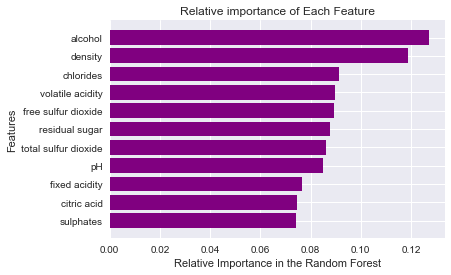

In [45]:
#Feature importance
rfi = RandomForestClassifier(n_estimators=15)
rfi.fit(X_train,y_train)
importance_list = rfi.feature_importances_

name_list = df.columns[:-1]
# Sort by the importance
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
y_pos = np.arange(len(name_list))

plt.barh(y_pos,importance_list,align='center',color='purple')
plt.yticks(range(len(name_list)),name_list)

plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

# COMPARISON OF MODEL

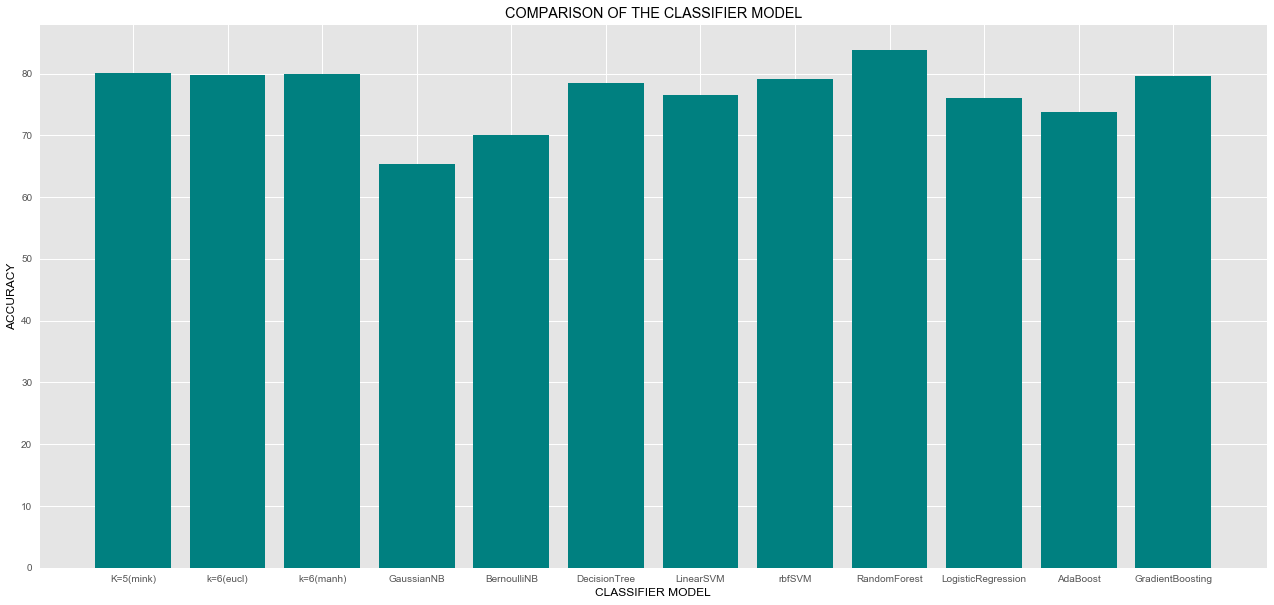

In [70]:
#COMPARISON OF VARIOUS MODEL ACCURACY BAR GRAPH
x = ("K=5(mink)", "k=6(eucl)", "k=6(manh)", "GaussianNB", "BernoulliNB", "DecisionTree","LinearSVM","rbfSVM",
           "RandomForest","LogisticRegression","AdaBoost","GradientBoosting")
plt.figure(1,figsize=(22,10))
acc= [80.06,79.72,79.93,65.30,70.06,78.50,76.59,79.18,83.80,76.05,73.74,79.59]

plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, acc, color='teal',label='black')
plt.xlabel("CLASSIFIER MODEL",color='black')
plt.ylabel("ACCURACY",color='black')
plt.title("COMPARISON OF THE CLASSIFIER MODEL",color='black')

plt.xticks(x_pos, x)
plt.show()